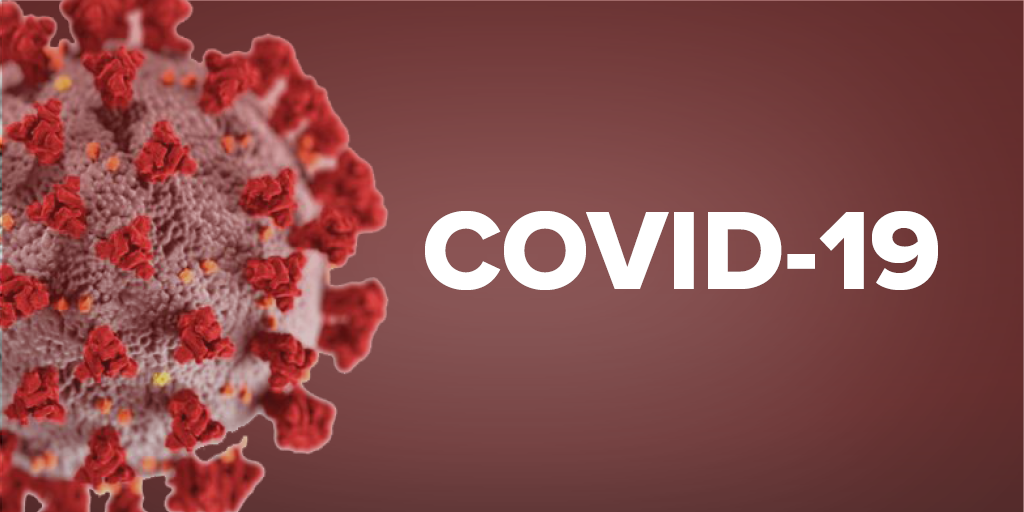

In [ ]:
import os
from datetime import date
import pandas as pd
import numpy as np

from folium import plugins
import folium


import matplotlib.pyplot as plt
import seaborn as sns

#To visualise the trend and analyse.
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
# from plotly.subplots import make_subplots

import pycountry
import plotly.offline as py
from plotly.offline import init_notebook_mode 


py.init_notebook_mode(connected=True)
%matplotlib inline

## COVID-19 Dataset

In [ ]:
covid_19_data = pd.read_csv(
    "../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
covid_19_data.drop("SNo", inplace=True, axis=1)
covid_19_data.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'Province',
    'Last Update': 'UpdatedOn'
},
    inplace=True)
covid_19_data['Country'].replace({'Mainland China': 'China'}, inplace=True)
covid_19_data['Date'] = covid_19_data['ObservationDate'].apply(pd.to_datetime)

### **Data Description**

In [ ]:
# To get statistical analysis of numerical dimensions
covid_19_data.describe()

In [ ]:
covid_19_data.head()

## Data Preprocessing

In [ ]:
data = covid_19_data['Date'][-1:].astype('str')
year = int(data.values[0].split('-')[0])
month = int(data.values[0].split('-')[1])
day = int(data.values[0].split('-')[2].split()[0])

latest_data = covid_19_data[covid_19_data['Date'] >= pd.Timestamp(date(year, month, day))]
latest_data.head()

In [ ]:
observational_data = latest_data[['Date',"Country", "Confirmed", "Deaths", "Recovered"]]
observational_data.head()

### **Countrywise Data**

In [ ]:
Country_grouped = covid_19_data.groupby(by=['Date', 'Country'],as_index=False)['Confirmed', 'Deaths','Recovered'].sum()
Country_grouped.head()

### **Date wise Data**

In [ ]:
date_grouped = covid_19_data.groupby(by=['Date'],as_index=False)['Confirmed', 'Deaths','Recovered'].sum()
date_grouped.head()

###  **Top 10 Worst Affected Countries**

In [ ]:
topcountries=covid_19_data.groupby(by=['Country'],as_index=False)['Confirmed','Deaths','Recovered'].max()
topcountries = topcountries.sort_values(by=['Confirmed'],ascending=False)[:10][::-1]
topcountries.head(n=10)

### **COVID-19: Confirmed Spread** 

In [ ]:
df = px.data.gapminder()
tidy_data = covid_19_data.groupby(by=['Date', 'Country'],
                                  as_index=False)['Confirmed', 'Deaths',
                                                  "Recovered"].max()

tidy_data['Date'] = pd.to_datetime(tidy_data['Date'])
tidy_data['Date'] = tidy_data['Date'].dt.strftime('%m/%d/%Y')
tidy_data['Size'] = tidy_data['Confirmed'].pow(1)

fig = px.scatter_geo(tidy_data,
                     locations="Country",
                     locationmode='country names',
                     color="Confirmed",
                     size='Size',
                     hover_name="Country",
                     range_color=[0, 1500],
                     projection="natural earth",
                     animation_frame="Date",
                     title='COVID-19: World Wide  Deaseas Spread Over Time',
                     color_continuous_scale="amp")

fig.show()

### **COVID-19: Confirmed Worldwide**

In [ ]:
dates = Country_grouped['Date']
confirmed = date_grouped['Confirmed']

plt.figure(figsize=(21,12))
plt.title('Confirmed cases per day worldwide', weight='bold', fontsize=18)
plt.xticks(rotation=70)
sns.set(style="dark", rc={"lines.linewidth":3.4,})
sns.lineplot(x=dates,y=confirmed,label="confirmed",marker='o', color="black",legend="full")

### **Top Confirmed cases so far**

In [ ]:
fig = px.bar(data_frame=topcountries,
             x='Confirmed',
             y='Country',
             title='Confirmed Cases Top-Countries',
             opacity=0.9,
             text='Confirmed',
             height=1000,
             orientation='h',
             color_discrete_sequence=['white'])
fig.show()

### **COVID-19: Fatality Spread**

In [ ]:
fig = px.scatter_geo(tidy_data,
                     locations="Country",
                     locationmode='country names',
                     color="Deaths",
                     size='Size',
                     hover_name="Country",
                     range_color=[0, 1500],
                     projection="natural earth",
                     animation_frame="Date",
                     title='COVID-19: World Wide  fatality Over Time',
                     color_continuous_scale="Reds")

fig.show()

### **COVID-19: Fatal Worldwide**

In [ ]:
dates = Country_grouped['Date']
deaths = date_grouped['Deaths']

plt.figure(figsize=(21,12))
plt.title('Fatal cases per day : Worldwide', weight='bold', fontsize=18)
plt.xticks(rotation=70)
sns.set(style="ticks", rc={"lines.linewidth":3.4,})

sns.lineplot(x=dates,y=deaths,label="Deaths",marker='o', color="#e74c3c",legend="full")

### **Top Fatal cases so far**

In [ ]:
fig = px.bar(data_frame=topcountries,
             x='Deaths',
             y='Country',
             title='Fatal Cases Top-Countries',
             opacity=0.9,
             text='Deaths',
             height=1000,
             orientation='h',
             color_discrete_sequence=['Red'])
fig.show()

### **COVID-19: Recovered Spread**

In [ ]:
fig = px.scatter_geo(tidy_data,
                     locations="Country",
                     locationmode='country names',
                     color="Recovered",
                     size='Size',
                     hover_name="Country",
                     range_color=[0, 1500],
                     projection="natural earth",
                     animation_frame="Date",
                     title='COVID-19: World wide recovery over time',
                     color_continuous_scale="BuGn")

fig.show()

### **COVID-19: Recovered Worldwide**

In [ ]:
dates = Country_grouped['Date']
recovered = date_grouped['Recovered']

plt.figure(figsize=(21,12))
plt.title('Recovered cases per day : Worldwide', weight='bold', fontsize=18)
plt.xticks(rotation=70)
sns.set(style="ticks", rc={"lines.linewidth":3.4,})

sns.lineplot(x=dates,y=recovered,label="Recovered",marker='o', color="green",legend="full")

### **Top Recovered cases so far**


In [ ]:
fig = px.bar(data_frame=topcountries,
             x='Recovered',
             y='Country',
             title='Recovered Cases Top-Countries',
             opacity=0.9,
             text='Deaths',
             height=1000,
             orientation='h',
             color_discrete_sequence=['Green'])
fig.show()

<br><br><br><br><br><br><br><br><br>

### **COVID-19: Wordlwide Presence**

In [ ]:
# Importing the world_coordinates dataset
data = Country_grouped.sort_values(by=['Date'], ascending=False)[:75][::-1]
coordinates = pd.read_csv('../input/worldcoordinates/world_coordinates.csv')

# coordinates = pd.read_csv('./input/novel-corona-virus-2019-dataset/world_coordinates.csv')

# Merging the world coordinates dataframe with original dataframe
pandemic_data = pd.merge(coordinates, data, on='Country')
pandemic_data.head()

In [ ]:
# create World Geographical Map.
Geographics = folium.Map(location=[2, -2],
                         width='100%',
                         height='100%',
                         left='0%',
                         top='0%',
                         position='relative',
                         zoom_start=2.5)

folium.TileLayer('cartodbdark_matter').add_to(Geographics)

for lat, lon, confirmed, deaths, recovered, name in zip(
        pandemic_data['latitude'], pandemic_data['longitude'],
        pandemic_data['Confirmed'], pandemic_data['Deaths'],
        pandemic_data['Recovered'], pandemic_data['Country']):
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
               '<strong>Confirmed Cases</strong>: ' + str(confirmed) + '<br>'
               '<strong>Fatal Cases</strong>: ' + str(deaths) + '<br>'
               '<strong>Recovered Cases</strong>: ' + str(recovered) + '<br>'),
        color='yellow',
        fill_color='yellow',
        fill_opacity=0.5).add_to(Geographics)
Geographics

### **COVID-19: Wordlwide Fatality**

In [ ]:
# create World Geographical Map.
Geographics = folium.Map(location=[2, -2],
                         width='100%',
                         height='100%',
                         left='0%',
                         top='0%',
                         position='relative',
                         zoom_start=2.5)

folium.TileLayer('cartodbdark_matter').add_to(Geographics)

for i in range(0,len(pandemic_data)):
    folium.Circle(
        location=[pandemic_data.iloc[i]['latitude'], pandemic_data.iloc[i]['longitude']],
        popup=pandemic_data.iloc[i]['Country'],
        radius=pandemic_data.iloc[i]['Deaths']*170,
        color='red',
        fill_color='red',
        fill_opacity=0.5).add_to(Geographics)
Geographics

### **COVID-19: Wordlwide Recovery**

In [ ]:
# create World Geographical Map.
Geographics = folium.Map(location=[2, -2],
                         width='100%',
                         height='100%',
                         left='0%',
                         top='0%',
                         position='relative',
                         zoom_start=2.5)

folium.TileLayer('cartodbdark_matter').add_to(Geographics)

for i in range(0,len(pandemic_data)):
    folium.Circle(
        location=[pandemic_data.iloc[i]['latitude'], pandemic_data.iloc[i]['longitude']],
        popup=pandemic_data.iloc[i]['Country'],
        radius=pandemic_data.iloc[i]['Recovered']*20,
        color='green',
        fill_color='green',
        fill_opacity=0.5).add_to(Geographics)
Geographics

### **How top countries got infected over time period**

In [ ]:
def barPlotter(Country):
    data = covid_19_data.groupby(by=['Country','Date'],as_index=False)['Confirmed', 'Deaths','Recovered'].sum()
    data = data[data.Country == Country]
    fig = px.bar(data, x='Date', y='Confirmed',height=1000,text="Confirmed",title=Country)
    fig.show()

### **China**

In [ ]:
barPlotter("China")

### **Italy**

In [ ]:
barPlotter("Italy")

### **USA**

In [ ]:
barPlotter("US")

### **Iran**

In [ ]:
barPlotter("Iran")

**If you find it useful please upvote and share the kernel.
I will be waiting for your valuable feedbacks as well as will be adding Inferential Statistics to this existing work.**